In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os
import numpy as np
from sklearn import preprocessing
from numpy import random
from scipy import linalg as LA 
import time
import pickle
import cv2

2024-05-19 04:54:24.089551: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 04:54:24.089644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 04:54:24.233772: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def load_model(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    return model

def predict(model, test_x):
    Beta1OfEachWindow = model['Beta1OfEachWindow']
    weightOfEnhanceLayer = model['weightOfEnhanceLayer']
    distOfMaxAndMin = model['distOfMaxAndMin']
    minOfEachWindow = model['minOfEachWindow']
    OutputWeight = model['OutputWeight']
    parameterOfShrink = model['parameterOfShrink']
    
    test_x = preprocessing.scale(test_x, axis=1)
    FeatureOfInputDataWithBiasTest = np.hstack([test_x, 0.1 * np.ones((test_x.shape[0], 1))])
    OutputOfFeatureMappingLayerTest = np.zeros([test_x.shape[0], len(Beta1OfEachWindow) * Beta1OfEachWindow[0].shape[1]])

    for i in range(len(Beta1OfEachWindow)):
        outputOfEachWindowTest = np.dot(FeatureOfInputDataWithBiasTest, Beta1OfEachWindow[i])
        OutputOfFeatureMappingLayerTest[:, Beta1OfEachWindow[i].shape[1] * i:Beta1OfEachWindow[i].shape[1] * (i + 1)] = \
            (outputOfEachWindowTest - minOfEachWindow[i]) / distOfMaxAndMin[i]

    InputOfEnhanceLayerWithBiasTest = np.hstack([OutputOfFeatureMappingLayerTest, 0.1 * np.ones((OutputOfFeatureMappingLayerTest.shape[0], 1))])
    tempOfOutputOfEnhanceLayerTest = np.dot(InputOfEnhanceLayerWithBiasTest, weightOfEnhanceLayer)
    OutputOfEnhanceLayerTest = tansig(tempOfOutputOfEnhanceLayerTest * parameterOfShrink)
    InputOfOutputLayerTest = np.hstack([OutputOfFeatureMappingLayerTest, OutputOfEnhanceLayerTest])
    OutputOfTest = np.dot(InputOfOutputLayerTest, OutputWeight)

    return OutputOfTest


In [3]:

# Function to preprocess a single image
def preprocess_image(image, target_size):
    image = cv2.resize(image, target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    return image

# Function to extract features from a single image using VGG16
def extract_features_from_image(image, target_size):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))
    model = Model(inputs=base_model.input, outputs=base_model.output)
    image = preprocess_image(image, target_size)
    features = model.predict(image)
    features = features.flatten()
    return features



In [4]:
under=cv2.imread('/kaggle/input/fusion-test/00000 (1).png')

target_size = (224, 224)  # VGG16 expects 224x224 images

over=cv2.imread('/kaggle/input/fusion-test/00000 (2).png')
over_f=extract_features_from_image(over, target_size)

under_f=extract_features_from_image(under, target_size)


       0/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

 4849664/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

15654912/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

27787264/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

40550400/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

55328768/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2024-05-19 04:54:38.123301: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.42855, expected 3.64542
2024-05-19 04:54:38.123357: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.87036, expected 5.08723
2024-05-19 04:54:38.123366: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.04003, expected 5.2569
2024-05-19 04:54:38.123374: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.22034, expected 5.43722
2024-05-19 04:54:38.123382: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 4.90026, expected 4.11714
2024-05-19 04:54:38.123389: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.21068, expected 4.42756
2024-05-19 04:54:38.123397: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.92061, expected 5.13748
2024-05-19 04:54:38.123404: E external/local_xla/xla/ser

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1716094479.971435      67 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


In [5]:
import numpy as np
import cv2
import pickle
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import StandardScaler

# Load BLS model
def load_model(model_path):
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    return model

# Function to preprocess a single image
def preprocess_image(image, target_size):
    image = cv2.resize(image, target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    return image

# Function to extract features from a single image using VGG16
def extract_features_from_image(image, target_size):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))
    model = Model(inputs=base_model.input, outputs=base_model.output)
    image = preprocess_image(image, target_size)
    features = model.predict(image)
    features = features.flatten()
    return features


def predict(model, test_x):
    def tansig(x):
        return (2/(1+np.exp(-2*x)))-1

    Beta1OfEachWindow = model.get('Beta1OfEachWindow')
    weightOfEnhanceLayer = model.get('weightOfEnhanceLayer')
    OutputWeight = model.get('OutputWeight')
    parameterOfShrink = model.get('parameterOfShrink')
    distOfMaxAndMin = model.get('distOfMaxAndMin')
    minOfEachWindow = model.get('minOfEachWindow')
    ymin = 0
    ymax = 1
    # Set your parameters
    s = 0.5
    c = 0.01
    N1 = 100
    N2 = 5
    N3 = 50
    L = 5
    M1 = 20
    M2 = 10
    M3 = 20
    if Beta1OfEachWindow is None or OutputWeight is None or parameterOfShrink is None or weightOfEnhanceLayer is None:
        raise KeyError("Model is missing required keys. Keys found: {}".format(model.keys()))

    if test_x.ndim == 1:
        test_x = np.expand_dims(test_x, axis=0)

    # Scale the input arrays
    #scaler = StandardScaler()
    #test_x = scaler.fit_transform(test_x)

    FeatureOfInputDataWithBiasTest = np.hstack([test_x, 0.1 * np.ones((test_x.shape[0], 1))])
    OutputOfFeatureMappingLayerTest = np.zeros([test_x.shape[0], len(Beta1OfEachWindow) * Beta1OfEachWindow[0].shape[1]])

    for i in range(len(Beta1OfEachWindow)):
        outputOfEachWindowTest = np.dot(FeatureOfInputDataWithBiasTest, Beta1OfEachWindow[i])
        OutputOfFeatureMappingLayerTest[:, N1 * i:N1 * (i + 1)] = (ymax - ymin) * (outputOfEachWindowTest - minOfEachWindow[i]) / distOfMaxAndMin[i] - ymin

    InputOfEnhanceLayerWithBiasTest = np.hstack([OutputOfFeatureMappingLayerTest, 0.1 * np.ones((OutputOfFeatureMappingLayerTest.shape[0], 1))])
    tempOfOutputOfEnhanceLayerTest = np.dot(InputOfEnhanceLayerWithBiasTest, weightOfEnhanceLayer)
    OutputOfEnhanceLayerTest = tansig(tempOfOutputOfEnhanceLayerTest * parameterOfShrink)
    InputOfOutputLayerTest = np.hstack([OutputOfFeatureMappingLayerTest, OutputOfEnhanceLayerTest])
    OutputOfTest = np.dot(InputOfOutputLayerTest, OutputWeight)
    
    return OutputOfTest/100000

# Example usage
target_size = (224, 224)  # VGG16 expects 224x224 images
bls_model_path = '/kaggle/input/bls-trained/bls_model.pkl'

# Load the BLS model
model = load_model(bls_model_path)

# Load and preprocess the image
image_path = '/kaggle/input/fusion-test/00000 (2).png'
image = cv2.imread(image_path)

# Extract features from the image
image_features = extract_features_from_image(image, target_size)

# Predict the class using the BLS model
predictions = predict(model, image_features)

# Output the class prediction
print("Predicted class:", predictions[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Predicted class: [[-0.07055118 -0.93561566  1.00467819]]


In [6]:
# Load and preprocess the image
image_path = '/kaggle/input/fusion-test/00000.png'
image = cv2.imread(image_path)

# Extract features from the image
image_features = extract_features_from_image(image, target_size)

# Predict the class using the BLS model
predictions = predict(model, image_features)

# Output the class prediction
print("Predicted class:", predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Predicted class: [[ 0.43844982 -0.52947277  0.08979292]]


In [7]:
# Load and preprocess the image
image_path = '/kaggle/input/fusion-test/00000 (1).png'
image = cv2.imread(image_path)

# Extract features from the image
image_features = extract_features_from_image(image, target_size)

# Predict the class using the BLS model
predictions = predict(model, image_features)

# Output the class prediction
print("Predicted class:", predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Predicted class: [[-0.90376792  0.88928501  0.01424592]]


In [8]:
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array
from keras.models import Model
import pickle

# Function to preprocess a single image
def preprocess_image(image, target_size):
    image = cv2.resize(image, target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    return image

# Function to extract features from a single image using VGG16
def extract_features_from_image(image, target_size):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))
    model = Model(inputs=base_model.input, outputs=base_model.output)
    image = preprocess_image(image, target_size)
    features = model.predict(image)
    features = features.flatten()
    return features

def assign_fusion_weights(region, model, target_size):
    features = extract_features_from_image(region, target_size)
    region_prob = predict(model,np.expand_dims(features, axis=0))
    weight = 2-(np.min(region_prob[0]))
    return weight

def split_image_into_regions(image):
    height, width, channels = image.shape
    if channels != 3:
        raise ValueError(f"Expected image with 3 channels, but got {channels}")

    regions = []
    
    # Determine the size of each region
    num_rows = 2
    num_cols = 15
    region_height = height // num_rows
    region_width = width // num_cols

    for y in range(num_rows):  
        for x in range(num_cols):  
            region = image[y * region_height:(y + 1) * region_height, x * region_width:(x + 1) * region_width]
            regions.append(region)
    
    return regions


def blend_images(images, weights):
    # Ensure that the number of images and weights match
    if len(images) != len(weights):
        print("Length of images:", len(images))
        print("Length of weights:", len(weights))
        raise ValueError("The number of images and weights must be the same.")

    # Normalize the weights to ensure they sum to 1
    weights = np.array(weights)
    weights /= np.sum(weights)

    # Create an empty array for the blended image
    blended_image = np.zeros_like(images[0], dtype=np.float32)

    # Iterate over images and their corresponding weights
    for img, weight in zip(images, weights):
        img = img.astype(np.float32)  # Convert image to float32 for proper blending
        blended_image += img * weight

    # Clip the values to be in the valid range [0, 255] and convert to uint8
    blended_image = np.clip(blended_image, 0, 255).astype(np.uint8)

    return blended_image

def fuse_multi_exposure_images(image_paths, target_size, bls_model_path):
    # Load the BLS model
    with open(bls_model_path, 'rb') as f:
        bls_model = pickle.load(f)

    # List of weights corresponding to each image
    weights = []

    # Load images and split into regions
    regions_list = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        if img is None:
            raise FileNotFoundError(f"Image file '{img_path}' could not be loaded.")
        regions = split_image_into_regions(img)
        for region in regions:
            
            regions_list.append(regions)


        
        for im in regions_list[0]:
            weight = assign_fusion_weights(im, bls_model, target_size)  # Only need one region for weight calculation
            weights.append(weight)

    # Blend the regions based on weights
    blended_regions = []
    for region_idx in range(len(regions_list[0])):
        region_images = [regions_list[i][region_idx] for i in range(len(regions_list))]
        blended_region = blend_images(region_images, weights)
        blended_regions.append(blended_region)

    # Concatenate the blended regions to form the final fused image
    row1 = np.concatenate(blended_regions[:15], axis=1)
    row2 = np.concatenate(blended_regions[15:], axis=1)
    fused_image = np.concatenate((row1, row2), axis=0)

    return fused_image

# Example usage
if __name__ == "__main__":
    # Example usage:
    image_paths = ['/kaggle/input/fusion-test/00000 (1).png', '/kaggle/input/fusion-test/00000 (2).png']
    target_size = (224, 224)
    bls_model_path = '/kaggle/input/bls-trained/bls_model.pkl'

    # Fuse multi-exposure images
    fused_image = fuse_multi_exposure_images(image_paths, target_size, bls_model_path)

    # Save the fused image
    cv2.imwrite('/kaggle/working/fused_image.png', fused_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


/tmp/ipykernel_24/2704496626.py:36: RuntimeWarning: overflow encountered in exp
  return (2/(1+np.exp(-2*x)))-1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 781ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


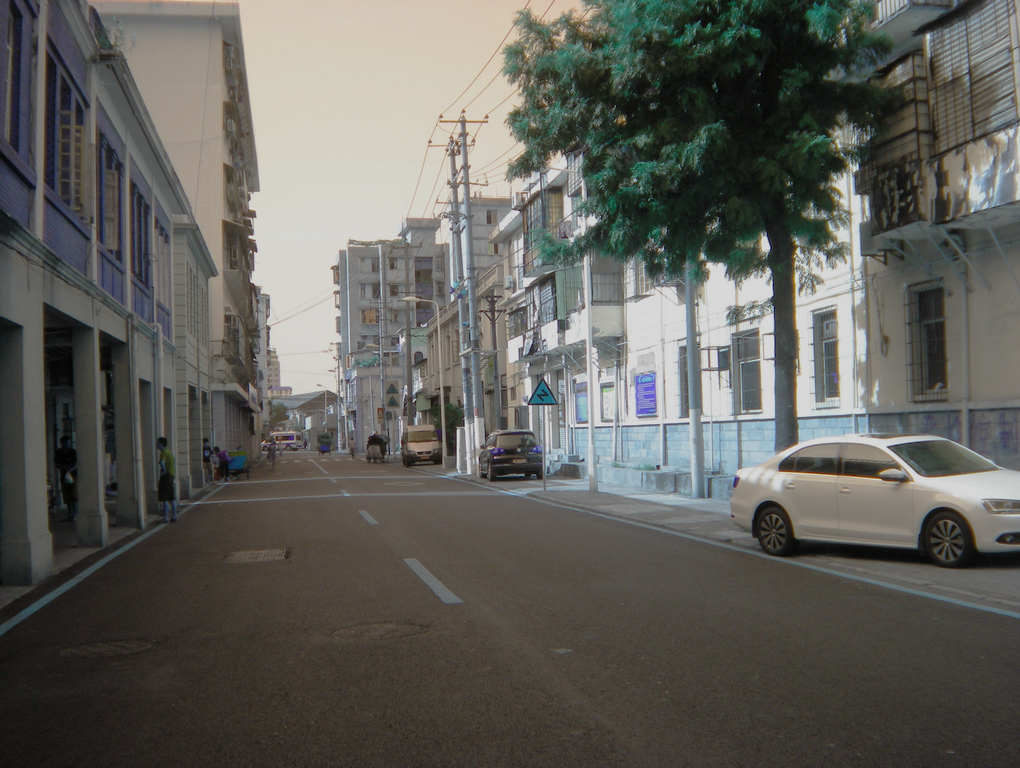

In [9]:
from PIL import Image
Image.fromarray(fused_image)

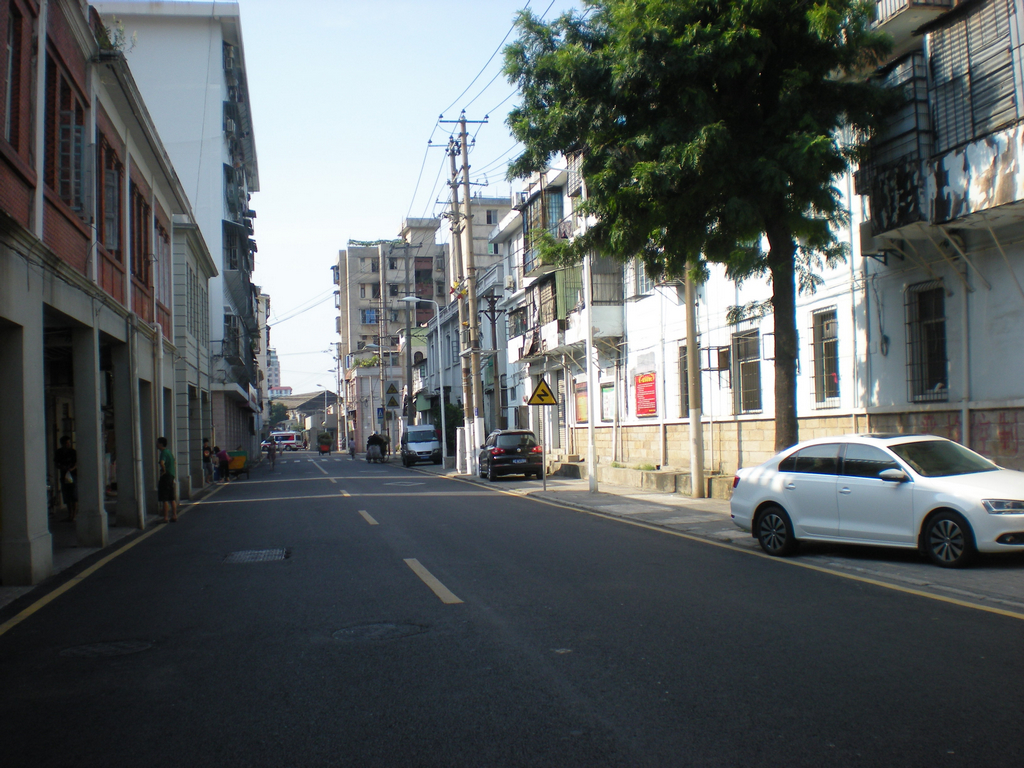

In [10]:
Image.open('/kaggle/input/fusion-test/00000.png')

In [11]:
from skimage.metrics import structural_similarity as ssim
import cv2

def calculate_ssim(image1_path, image2_path):
    # Read the images
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)
    image1=cv2.resize(image1,(500,500))
    image2=cv2.resize(image2,(500,500))

    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Compute SSIM between two images
    ssim_index = ssim(gray1, gray2)

    return ssim_index

# Example usage
image1_path = "/kaggle/working/fused_image.png"
image2_path = "/kaggle/input/fusion-test/00000.png"
similarity_index = calculate_ssim(image1_path, image2_path)
print("SSIM between the two images:", similarity_index)


SSIM between the two images: 0.7291221698308042


In [12]:
!git clone https://github.com/xingchenzhang/MEFB.git

Cloning into 'MEFB'...


remote: Enumerating objects: 2497, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (55/55), done.


remote: Total 2497 (delta 25), reused 82 (delta 25), pack-reused 2413
Receiving objects: 100% (2497/2497), 446.31 MiB | 46.64 MiB/s, done.


Resolving deltas: 100% (25/25), done.


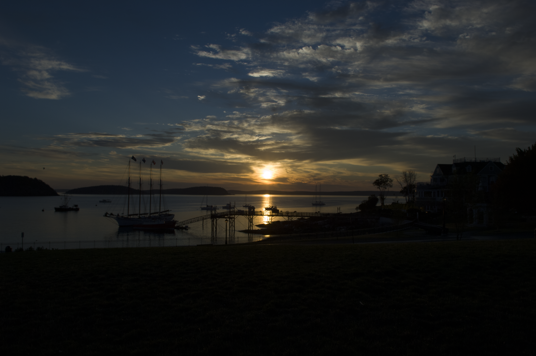

In [13]:
from PIL import Image

def open_tiff_image(tiff_path):
    # Open the TIFF image
    image = Image.open(tiff_path)

    return image

# Example usage
tiff_path = "/kaggle/working/MEFB/input/BarHarborSunrise/BarHarborSunrise_A.tif"
image_data = open_tiff_image(tiff_path)
image_data 

In [14]:
import os
import cv2

def convert_images_to_jpg(input_dir, output_dir):
    # Iterate through all files and directories in the input directory
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            # Check if the file is an image
            if any(file.lower().endswith(ext) for ext in ['.png', '.jpeg', '.jpg', '.bmp', '.gif', '.tif', '.tiff']):
                # Construct the input and output file paths
                input_file_path = os.path.join(root, file)
                output_file_path = os.path.join(output_dir, os.path.relpath(root, input_dir), os.path.splitext(file)[0] + '.jpg')

                # Ensure the output directory exists
                os.makedirs(os.path.dirname(output_file_path), exist_ok=True)

                # Read the image and save it as jpg
                image = cv2.imread(input_file_path)
                cv2.imwrite(output_file_path, image, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

# Example usage
input_directory = '/kaggle/working/MEFB/input'
output_directory = '/kaggle/working/test'

convert_images_to_jpg(input_directory, output_directory)


In [15]:
# Example usage
if __name__ == "__main__":
    base_dir = '/kaggle/working/test'
    target_size = (224, 224)
    bls_model_path = '/kaggle/input/bls-trained/bls_model.pkl'

    # Iterate through the subdirectories in the base directory
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        if os.path.isdir(folder_path):
            image_paths_A = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if 'A' in f])
            image_paths_B = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if 'B' in f])

            if len(image_paths_A) != len(image_paths_B):
                print(f"Skipping folder '{folder_name}' due to mismatched A and B images.")
                continue

            for img_path_A, img_path_B in zip(image_paths_A, image_paths_B):
                image_paths = [img_path_A, img_path_B]
                fused_image = fuse_multi_exposure_images(image_paths, target_size, bls_model_path)
                output_path = os.path.join('/kaggle/working', f"{folder_name}.png")
                cv2.imwrite(output_path, fused_image)
                print(f"Fused image saved to {output_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


/tmp/ipykernel_24/2704496626.py:36: RuntimeWarning: overflow encountered in exp
  return (2/(1+np.exp(-2*x)))-1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 881ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Fused image saved to /kaggle/working/WindowTrim.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Fused image saved to /kaggle/working/Kluki.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 893ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Fused image saved to /kaggle/working/Zentrum.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Fused image saved to /kaggle/working/building.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Fused image saved to /kaggle/working/door2.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Fused image saved to /kaggle/working/Studio.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 874ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


Fused image saved to /kaggle/working/Lamp.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 877ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Fused image saved to /kaggle/working/Venice.png
Skipping folder 'Knossos6' due to mismatched A and B images.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 874ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Fused image saved to /kaggle/working/flowerGate.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 882ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step


Fused image saved to /kaggle/working/dessert.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Fused image saved to /kaggle/working/Laurenziana.png
Skipping folder 'ArtistPalette' due to mismatched A and B images.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 881ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Fused image saved to /kaggle/working/Stream.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Fused image saved to /kaggle/working/ICCV_10.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 864ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Fused image saved to /kaggle/working/Villa.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 858ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Fused image saved to /kaggle/working/ICCV_13.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Fused image saved to /kaggle/working/SevenElevenNight.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 892ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Fused image saved to /kaggle/working/Landscape.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 859ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Fused image saved to /kaggle/working/Office.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 858ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Fused image saved to /kaggle/working/ICCV_01.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Fused image saved to /kaggle/working/garage.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 880ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Fused image saved to /kaggle/working/LivingRoom.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 877ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Fused image saved to /kaggle/working/ICCV_03.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


Fused image saved to /kaggle/working/ICCV_02.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Fused image saved to /kaggle/working/road.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 944ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Fused image saved to /kaggle/working/ICCV_12.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 899ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Fused image saved to /kaggle/working/AirBellowsGap.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 985ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Fused image saved to /kaggle/working/AirBellowsGap.png
Skipping folder 'Lake1' due to mismatched A and B images.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 967ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Fused image saved to /kaggle/working/ICCV_08.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 911ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 910ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step


Fused image saved to /kaggle/working/Church.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import quality_score as qab
from skimage.metrics import peak_signal_noise_ratio as psnr

def calculate_metrics(image1_path, image2_path):
    # Read the images
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Calculate SSIM
    ssim_index = ssim(gray1, gray2)

    # Calculate MSE
    mse_value = mse(gray1, gray2)

    # Calculate QAB
    qab_value = qab(image1, image2)

    # Calculate PSNR
    psnr_value = psnr(image1, image2)

    return ssim_index, mse_value, qab_value, psnr_value

# Example usage
image1_path = "/kaggle/input/fusion-test/00000.png"
image2_path = "/kaggle/working/fused_image.png"
ssim_index, mse_value, qab_value, psnr_value = calculate_metrics(image1_path, image2_path)

print("SSIM:", ssim_index)
print("MSE:", mse_value)
print("QAB:", qab_value)
print("PSNR:", psnr_value)
